In [1]:
#import packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import tensorflow as tf
import nltk
nltk.download('stopwords')
nltk.download('punkt') 
nltk.download('wordnet')  
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import re
import string
import nbconvert
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#import files
yp = pd.read_csv(r"C:\Users\alexa\Documents\WGU\MSDA\D213\yelp_labelled.txt", delimiter="\t", header=None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 2500)
yp['source']= pd.Series(["yelp" for x in range(len(yp.index))])
yp.head()

,0,1,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,yelp
4,The selection on the menu was great and so were the prices.,1,yelp


In [3]:
am = pd.read_csv(r'C:\Users\alexa\Documents\WGU\MSDA\D213\amazon_cells_labelled.txt', delimiter="\t", header=None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 2500)
am['source']= pd.Series(["amazon" for x in range(len(am.index))])
am.head()

,0,1,source
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0,amazon
4,The mic is great.,1,amazon


In [4]:
im = pd.read_csv(r'C:\Users\alexa\Documents\WGU\MSDA\D213\imdb_labelled.txt', delimiter="\t;", header=None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 2500)
im[[0, 1]]= im[0].str.split('\t', expand=True)
im['source']= pd.Series(["imdb" for x in range(len(im.index))])
im.head()

,0,1,source
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,imdb
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0,imdb
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0,imdb
3,Very little music or anything to speak of.,0,imdb
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.,1,imdb


In [5]:
yai = pd.concat([yp, am, im], ignore_index =True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 2500)
yai

,0,1,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,yelp
4,The selection on the menu was great and so were the prices.,1,yelp
...,...,...,...
2995,I just got bored watching Jessice Lange take her clothes off!,0,imdb
2996,"Unfortunately, any virtue in this film's production work was lost on a regrettable script.",0,imdb
2997,"In a word, it is embarrassing.",0,imdb
2998,Exceptionally bad!,0,imdb


In [6]:
#rename columns
yai = yai.rename(columns={0: "reviews", 1: "sentiment"})

In [7]:
#view shape of data
yai.shape

(3000, 3)

In [8]:
yai['sentiment'].unique()

array([1, 0, '0', '1'], dtype=object)

In [9]:
#convert string values to int in label column
yai['sentiment'] =  yai['sentiment'].replace('0', 0)
yai['sentiment'] = yai['sentiment'].replace('1',1)

In [10]:
#setting sentiment column to integers
yai['sentiment'].astype(int)

0       1
1       0
2       0
3       1
4       1
       ..
2995    0
2996    0
2997    0
2998    0
2999    0
Name: sentiment, Length: 3000, dtype: int32

In [11]:
#explore data
yai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   reviews    3000 non-null   object
 1   sentiment  3000 non-null   int64 
 2   source     3000 non-null   object
dtypes: int64(1), object(2)
memory usage: 70.4+ KB


In [12]:
# data summary statistics
yai.describe()

,sentiment
count,3000.000000
mean,0.500000
std,0.500083
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [13]:
#check for nulls
yai.isnull().sum()

reviews      0
sentiment    0
source       0
dtype: int64

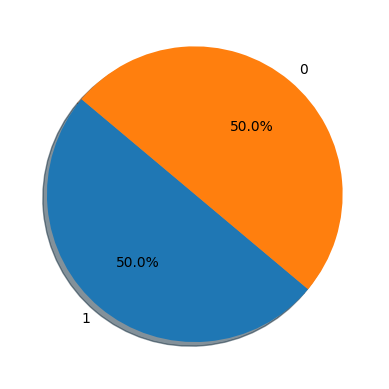

Number of Negative reviews: 1500
Number of Positive reviews: 1500


In [14]:
#sentiment counts,explorating the split between the negative and positive
sentiment = yai['sentiment'].value_counts()
plt.pie(sentiment, labels= sentiment.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()
#printing exact counts
print("Number of Negative reviews: {}".format(yai[yai['sentiment']==0].count()[0]))
print("Number of Positive reviews: {}".format(yai[yai['sentiment']==1].count()[0]))

In [15]:
# explore the various counts of words, characters, avg word length
yai['characters'] = yai['reviews'].apply(len)
yai['words_count'] = yai['reviews'].apply(lambda x: len(x.split()))
yai['avg_wordlen'] = yai['characters']/ yai['words_count']
yai.head()

,reviews,sentiment,source,characters,words_count,avg_wordlen
0,Wow... Loved this place.,1,yelp,24,4,6.000000
1,Crust is not good.,0,yelp,18,4,4.500000
2,Not tasty and the texture was just nasty.,0,yelp,41,8,5.125000
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,yelp,87,15,5.800000
4,The selection on the menu was great and so were the prices.,1,yelp,59,12,4.916667


In [16]:
#minimum/maximum review character length original data
print("Min. Length: " , min(yai['reviews'].str.len()))
print("Max. Length: " , max(yai['reviews'].str.len()))

Min. Length:  7
Max. Length:  479


In [17]:
#reviews value count
yai['reviews'].value_counts()

reviews
I won't be back.                                                                      2
Great Phone.                                                                          2
This is a great deal.                                                                 2
Works great!.                                                                         2
10/10                                                                                 2
                                                                                     ..
So there is no way for me to plug it in here in the US unless I go by a converter.    1
Good case, Excellent value.                                                           1
Great for the jawbone.                                                                1
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!       1
All in all its an insult to one's intelligence and a huge waste of money.             1
Name: count, Length: 298

Text(0, 0.5, 'Frequency')

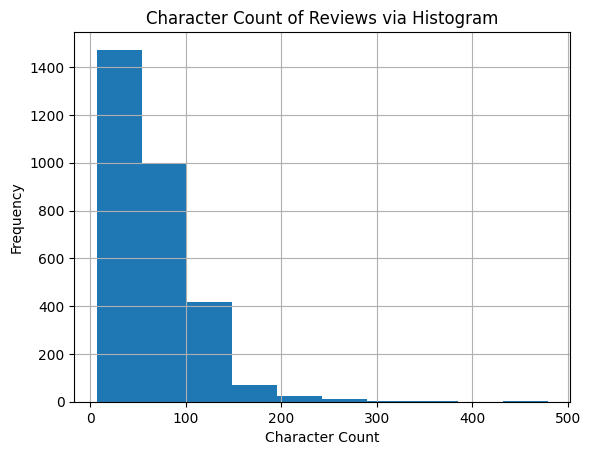

In [18]:
# Create a histogram of reviews by total char lengths
char_hist = yai['reviews'].str.len().hist()
char_hist.set_title('Character Count of Reviews via Histogram')
char_hist.set_xlabel('Character Count')
char_hist.set_ylabel('Frequency')

In [19]:
#lowercase words in dataset
yai['reviews_clean'] = yai['reviews'].str.lower()
yai['reviews_clean']

0                                                                           wow... loved this place.
1                                                                                 crust is not good.
2                                                          not tasty and the texture was just nasty.
3            stopped by during the late may bank holiday off rick steve recommendation and loved it.
4                                        the selection on the menu was great and so were the prices.
                                                    ...                                             
2995                                 i just got bored watching jessice lange take her clothes off!  
2996    unfortunately, any virtue in this film's production work was lost on a regrettable script.  
2997                                                                in a word, it is embarrassing.  
2998                                                                            exceptional

In [20]:
#showing unique characters(Elleh,2022).
review = yai['reviews_clean']
list_char = []
for word in review:
    for char in word:
        if char not in list_char:
            list_char.append(char)
print(list_char)

['w', 'o', '.', ' ', 'l', 'v', 'e', 'd', 't', 'h', 'i', 's', 'p', 'a', 'c', 'r', 'u', 'n', 'g', 'y', 'x', 'j', 'b', 'm', 'k', 'f', "'", ')', ',', '!', 'z', '-', '4', '2', '3', 'q', '5', '1', '0', '&', 'é', ':', ';', '9', '7', '(', '"', '/', '8', '$', '%', '+', '*', '?', '6', 'ê', '#', '[', ']', '\x96', '\x85', 'å', '\x97']


In [21]:
#showing examples of emojis within dataset
print(yai.iloc[1387,0]);
print(yai.iloc[1977,0]);

The best phone in market :).
:-)Oh, the charger seems to work fine.


In [22]:
#remove punctuation from dataset(Sewell, n.d.)
yai['reviews_clean']= yai['reviews_clean'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
yai.head()

,reviews,sentiment,source,characters,words_count,avg_wordlen,reviews_clean
0,Wow... Loved this place.,1,yelp,24,4,6.000000,wow loved this place
1,Crust is not good.,0,yelp,18,4,4.500000,crust is not good
2,Not tasty and the texture was just nasty.,0,yelp,41,8,5.125000,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,yelp,87,15,5.800000,stopped by during the late may bank holiday off rick steve recommendation and loved it
4,The selection on the menu was great and so were the prices.,1,yelp,59,12,4.916667,the selection on the menu was great and so were the prices


In [23]:
#reducing repetitive letters (Unknown, 2017).
def reduce_length(text):
    pattern = re.compile(r"(.)\1{2,}")
    reduce = pattern.sub(r"\1\1", text)
    return reduce

yai['reviews_clean']= yai['reviews_clean'].apply(lambda x: reduce_length(x))
yai.head()

,reviews,sentiment,source,characters,words_count,avg_wordlen,reviews_clean
0,Wow... Loved this place.,1,yelp,24,4,6.000000,wow loved this place
1,Crust is not good.,0,yelp,18,4,4.500000,crust is not good
2,Not tasty and the texture was just nasty.,0,yelp,41,8,5.125000,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,yelp,87,15,5.800000,stopped by during the late may bank holiday off rick steve recommendation and loved it
4,The selection on the menu was great and so were the prices.,1,yelp,59,12,4.916667,the selection on the menu was great and so were the prices


In [24]:
#tokenization
def toknz(text):
    tokens = word_tokenize(text)
    return tokens

yai['reviews_clean']= yai['reviews_clean'].apply(lambda x: toknz(x))
yai.head()

,reviews,sentiment,source,characters,words_count,avg_wordlen,reviews_clean
0,Wow... Loved this place.,1,yelp,24,4,6.000000,"[wow, loved, this, place]"
1,Crust is not good.,0,yelp,18,4,4.500000,"[crust, is, not, good]"
2,Not tasty and the texture was just nasty.,0,yelp,41,8,5.125000,"[not, tasty, and, the, texture, was, just, nasty]"
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,yelp,87,15,5.800000,"[stopped, by, during, the, late, may, bank, holiday, off, rick, steve, recommendation, and, loved, it]"
4,The selection on the menu was great and so were the prices.,1,yelp,59,12,4.916667,"[the, selection, on, the, menu, was, great, and, so, were, the, prices]"


In [25]:
#removing stop words
stop_word = set(stopwords.words('english'))

#excluding negatings words within stopwords
not_stop_word =  ['but', 'not', "aren't", 'couldn', "couldn't", "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
 "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
final_stop_words = set([word for word in stop_word if word not in not_stop_word])

def rmv_stop(txt):
    txt_stop = ([w for w in txt if w not in final_stop_words])
    return txt_stop

yai['reviews_clean'] = yai['reviews_clean'].apply(lambda x: rmv_stop(x))
yai.head()

,reviews,sentiment,source,characters,words_count,avg_wordlen,reviews_clean
0,Wow... Loved this place.,1,yelp,24,4,6.000000,"[wow, loved, place]"
1,Crust is not good.,0,yelp,18,4,4.500000,"[crust, not, good]"
2,Not tasty and the texture was just nasty.,0,yelp,41,8,5.125000,"[not, tasty, texture, nasty]"
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,yelp,87,15,5.800000,"[stopped, late, may, bank, holiday, rick, steve, recommendation, loved]"
4,The selection on the menu was great and so were the prices.,1,yelp,59,12,4.916667,"[selection, menu, great, prices]"


In [26]:
#stemmer
ps = nltk.stem.PorterStemmer()
def stemmer(text):
    text = [ps.stem(word) for word in text]
    return text
    
yai['reviews_clean'] = yai['reviews_clean'].apply(lambda x: stemmer(x))
yai.head()

,reviews,sentiment,source,characters,words_count,avg_wordlen,reviews_clean
0,Wow... Loved this place.,1,yelp,24,4,6.000000,"[wow, love, place]"
1,Crust is not good.,0,yelp,18,4,4.500000,"[crust, not, good]"
2,Not tasty and the texture was just nasty.,0,yelp,41,8,5.125000,"[not, tasti, textur, nasti]"
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,yelp,87,15,5.800000,"[stop, late, may, bank, holiday, rick, steve, recommend, love]"
4,The selection on the menu was great and so were the prices.,1,yelp,59,12,4.916667,"[select, menu, great, price]"


In [27]:
#vocab size, count of words (Elleh, 2022).
tokenizer = Tokenizer(oov_token= 'OOV', lower=False)
tokenizer.fit_on_texts(yai['reviews_clean'])
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocab Size: {vocab_size} Elements.")

Vocab Size: 4174 Elements.


In [28]:
#word embedding size, 4th root of vocab size
word_emb_dim = int(round(np.sqrt(np.sqrt(vocab_size)),0))
print( "Max Word Embedding Size or Embedding Dimensionality: ", word_emb_dim)

Max Word Embedding Size or Embedding Dimensionality:  8


In [29]:
#sequence length (Elleh, 2022).

rev_length = []
for char_len in review:
    rev_length.append(len(char_len.split(' ')))

rev_max = np.max(rev_length)
rev_min = np.min(rev_length)
rev_median  = np.median(rev_length)

print("Max. Sequence Length: " , rev_max)
print("Min. Sequence Length: " , rev_min)
print("Median Sequence Length: " , rev_median)

Max. Sequence Length:  73
Min. Sequence Length:  1
Median Sequence Length:  11.0


In [30]:
yai.columns

Index(['reviews', 'sentiment', 'source', 'characters', 'words_count',
       'avg_wordlen', 'reviews_clean'],
      dtype='object')

In [31]:
#drop feature columns that are no longer needed
yai.drop(['characters', 'words_count',
       'avg_wordlen', 'reviews'], axis=1, inplace=True)
yai.head()

,sentiment,source,reviews_clean
0,1,yelp,"[wow, love, place]"
1,0,yelp,"[crust, not, good]"
2,0,yelp,"[not, tasti, textur, nasti]"
3,1,yelp,"[stop, late, may, bank, holiday, rick, steve, recommend, love]"
4,1,yelp,"[select, menu, great, price]"


In [32]:
#train/test/validation split via 70/15/15

X = yai['reviews_clean'].values
y= yai['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size =0.30, random_state =39)

#splitting test for validation
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.50, random_state=39)

In [33]:
X_train.shape

(2100,)

In [34]:
y_train.shape

(2100,)

In [35]:
X_test.shape

(450,)

In [36]:
y_test.shape

(450,)

In [37]:
X_valid.shape

(450,)

In [38]:
y_valid.shape

(450,)

In [39]:
max_seq_len= rev_max
max_seq_len

73

In [40]:
#tokenize sequences
tokenizer = Tokenizer(oov_token = 'OOV')
tokenizer.fit_on_texts(X_train)

train_seq = tokenizer.texts_to_sequences(X_train)
test_seq = tokenizer.texts_to_sequences(X_test)
valid_seq = tokenizer.texts_to_sequences(X_valid)

In [41]:
word_index= tokenizer.word_index
word_index

{'OOV': 1,
 'not': 2,
 'great': 3,
 'good': 4,
 'movi': 5,
 'but': 6,
 'film': 7,
 'phone': 8,
 'one': 9,
 'time': 10,
 'work': 11,
 'like': 12,
 'place': 13,
 'food': 14,
 'servic': 15,
 'realli': 16,
 'go': 17,
 'bad': 18,
 'use': 19,
 'love': 20,
 'would': 21,
 'even': 22,
 'well': 23,
 'dont': 24,
 'back': 25,
 'get': 26,
 'best': 27,
 'also': 28,
 'ever': 29,
 'qualiti': 30,
 'recommend': 31,
 'product': 32,
 'look': 33,
 'charact': 34,
 'sound': 35,
 'make': 36,
 'im': 37,
 'never': 38,
 'headset': 39,
 'much': 40,
 'way': 41,
 'ive': 42,
 'excel': 43,
 'wast': 44,
 'price': 45,
 'see': 46,
 'think': 47,
 'thing': 48,
 'nice': 49,
 'made': 50,
 'better': 51,
 'say': 52,
 'disappoint': 53,
 'watch': 54,
 'ear': 55,
 'act': 56,
 'tri': 57,
 'could': 58,
 'first': 59,
 'come': 60,
 'batteri': 61,
 'still': 62,
 'got': 63,
 'didnt': 64,
 'want': 65,
 'minut': 66,
 'two': 67,
 'everi': 68,
 'year': 69,
 'suck': 70,
 'worst': 71,
 'feel': 72,
 'enough': 73,
 'end': 74,
 'order': 75,
 '

In [42]:
#example of tokenized sequence before padding
train_seq[397]

[114, 35, 30]

In [43]:
#padding sequences
train_pad = pad_sequences(train_seq, padding='post', maxlen=max_seq_len)
test_pad = pad_sequences(test_seq, padding='post', maxlen=max_seq_len)
valid_pad = pad_sequences(valid_seq, padding='post', maxlen=max_seq_len)

In [44]:
train_pad.shape

(2100, 73)

In [45]:
train_pad

array([[ 951, 1458,    5, ...,    0,    0,    0],
       [   2,  416,  952, ...,    0,    0,    0],
       [ 145,  715, 1459, ...,    0,    0,    0],
       ...,
       [3385, 3386, 3387, ...,    0,    0,    0],
       [  32,   43,   11, ...,    0,    0,    0],
       [ 192, 3392,  184, ...,    0,    0,    0]])

In [46]:
#example of single padded sequence
train_pad[397]

array([114,  35,  30,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0])

In [47]:
test_pad.shape

(450, 73)

In [48]:
test_pad

array([[ 114, 1866,   27, ...,    0,    0,    0],
       [ 118,  538, 2541, ...,    0,    0,    0],
       [  39,  171,   19, ...,    0,    0,    0],
       ...,
       [  49,  254,   30, ...,    0,    0,    0],
       [ 409,  471,   68, ...,    0,    0,    0],
       [   1,   34,  278, ...,    0,    0,    0]])

In [49]:
valid_pad.shape

(450, 73)

In [50]:
valid_pad

array([[ 908, 1431, 1413, ...,    0,    0,    0],
       [  26,  639,   66, ...,    0,    0,    0],
       [1454,   14,  186, ...,    0,    0,    0],
       ...,
       [ 164,    1,  318, ...,    0,    0,    0],
       [   1,    1,   82, ...,    0,    0,    0],
       [1253,  235,  231, ...,    0,    0,    0]])

In [51]:
#printing cleaned csv files

yai.to_csv("AFD213Tk2_cleaned.csv")
pd.DataFrame(train_pad).to_csv("AFD213Tk2_trainpad.csv")
pd.DataFrame(test_pad).to_csv("AFD213Tk2_testpad.csv")
pd.DataFrame(valid_pad).to_csv("AFD213Tk2_validpad.csv")
pd.DataFrame(y_valid).to_csv("AFD213Tk2_validreviews.csv")
pd.DataFrame(y_train).to_csv("AFD213Tk2_trainreviews.csv")
pd.DataFrame(y_test).to_csv("AFD213Tk2_testreviews.csv")

In [52]:
# Sequential model
model = Sequential()
model.add(Embedding(input_dim= vocab_size, output_dim= word_emb_dim, input_length = max_seq_len))
model.add(Flatten())
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 73, 8)             33392     
                                                                 
 flatten (Flatten)           (None, 584)               0         
                                                                 
 dense (Dense)               (None, 6)                 3510      
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 36909 (144.18 KB)
Trainable params: 36909 (144.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [53]:
#early stopping check monitor
early_stop_ck = EarlyStopping(monitor='val_accuracy', patience =2)

In [54]:
modeling = model.fit(train_pad, y_train, validation_data = (valid_pad, y_valid), epochs=25, callbacks=early_stop_ck)

Epoch 1/25
66/66 [==============================] - 2s 11ms/step - loss: 0.6932 - accuracy: 0.4967 - val_loss: 0.6930 - val_accuracy: 0.5667
Epoch 2/25
66/66 [==============================] - 0s 6ms/step - loss: 0.6920 - accuracy: 0.6290 - val_loss: 0.6910 - val_accuracy: 0.6422
Epoch 3/25
66/66 [==============================] - 0s 5ms/step - loss: 0.6787 - accuracy: 0.7562 - val_loss: 0.6715 - val_accuracy: 0.7733
Epoch 4/25
66/66 [==============================] - 0s 6ms/step - loss: 0.6153 - accuracy: 0.8986 - val_loss: 0.6146 - val_accuracy: 0.7867
Epoch 5/25
66/66 [==============================] - 0s 5ms/step - loss: 0.4938 - accuracy: 0.9171 - val_loss: 0.5330 - val_accuracy: 0.8022
Epoch 6/25
66/66 [==============================] - 0s 5ms/step - loss: 0.3672 - accuracy: 0.9362 - val_loss: 0.4734 - val_accuracy: 0.8222
Epoch 7/25
66/66 [==============================] - 0s 6ms/step - loss: 0.2718 - accuracy: 0.9557 - val_loss: 0.4400 - val_accuracy: 0.8244
Epoch 8/25
66/66 [=

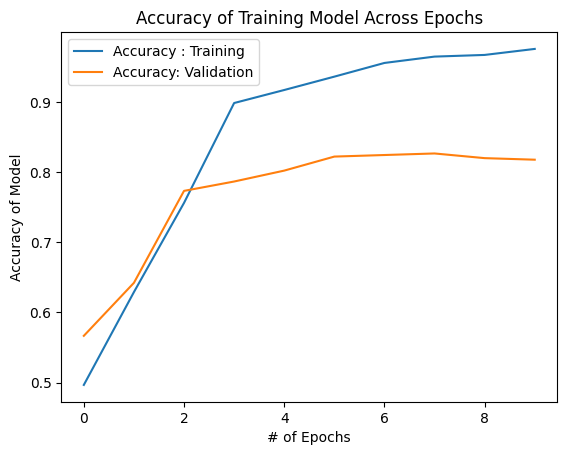

In [55]:
#plotting Accuracy across epochs
plt.plot(modeling.history['accuracy'], label= "Accuracy : Training")
plt.plot(modeling.history['val_accuracy'], label= "Accuracy: Validation")
plt.xlabel("# of Epochs")
plt.ylabel("Accuracy of Model")
plt.legend()
plt.title("Accuracy of Training Model Across Epochs")
plt.show()

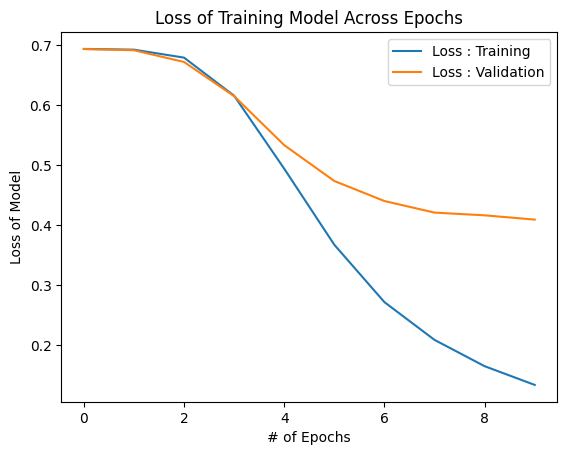

In [56]:
#plotting loss across epochs
plt.plot(modeling.history['loss'], label= "Loss : Training")
plt.plot(modeling.history['val_loss'], label= "Loss : Validation")
plt.xlabel("# of Epochs")
plt.ylabel("Loss of Model")
plt.legend()
plt.title("Loss of Training Model Across Epochs")
plt.show()

In [57]:
# evaluation of model on test data
ls, accrcy = model.evaluate(test_pad, y_test)
print('Accuracy: %f'% (accrcy*100))

15/15 [==============================] - 0s 2ms/step - loss: 0.4041 - accuracy: 0.8378
Accuracy: 83.777779


In [58]:
# predictions
y_pred = model.predict(test_pad)

15/15 [==============================] - 0s 2ms/step


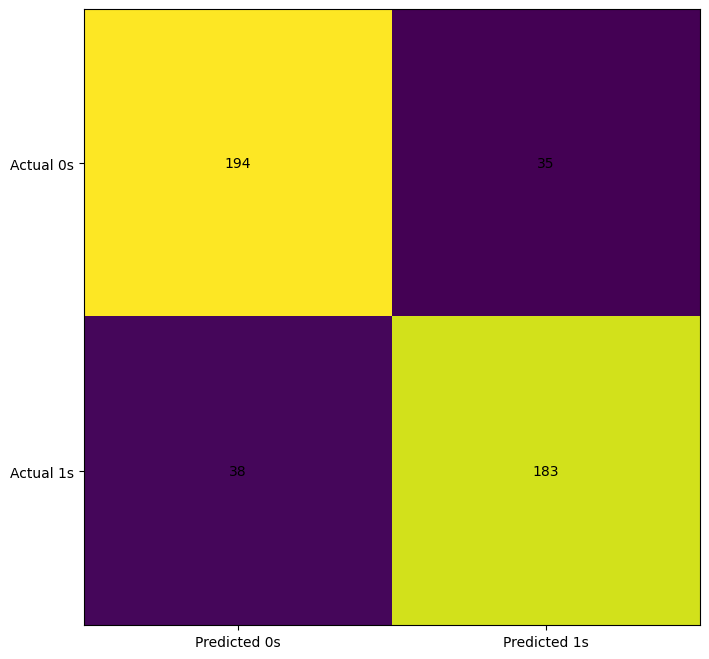

In [59]:
# round prediction to nearest integer
y_pred = np.rint(y_pred)

# Confusion matrix 
matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='black')
plt.show()

In [60]:
# saving model
model_file_name = "AFD213Tk2model.h5"
model.save(model_file_name)
print(f"Model successfully saved as {model_file_name}")

Model successfully saved as AFD213Tk2model.h5
